# **Parkinson disease prediction from drawings**




**Setup for use this code:**

1.   Download the whole folder, with the .ipynb files and the dataset.
2.   Upload the previously downloaded files to your Google Drive. 
3.   Open parkinsonClassifier.ipynb file.
4.   Select Runtime tab in the parkinsonClassifier.ipynb, then change runtime type to GPU.
5.   Download dependencies and libraries (you can download them here).
6.   Select Runtime, Run all, and allow autherization and sign in to your Google Drive. 




Import python libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import os
import glob



## **IMPORT DATASET**

**Connect Google Colab with Google Drive to reach dataset:**

In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Plot all the training: healthy images**

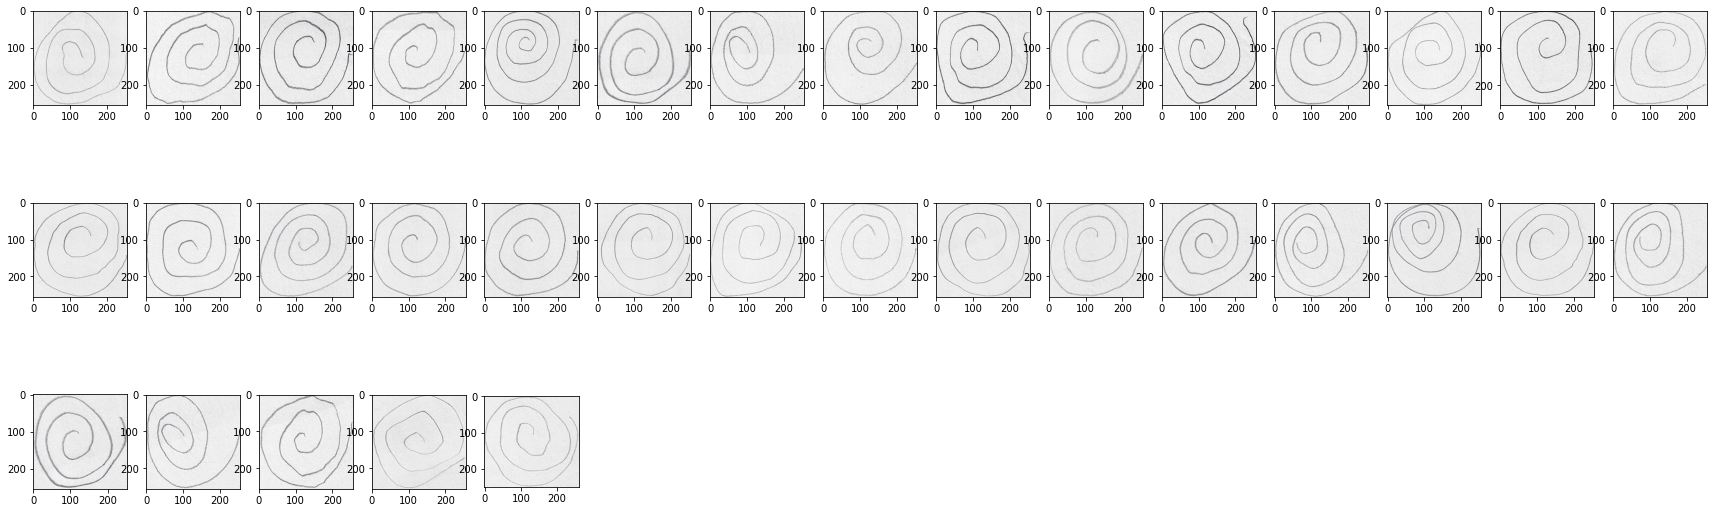

In [3]:
plt.figure(figsize=(30,10)) 
for i in range(1, 36, 1):
    plt.subplot(3,15,i )
    img = load_img("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/training/healthy/"+
                  os.listdir("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/training/healthy")[i])
    plt.imshow(img)   

**Plot all the training: Parkinson images**

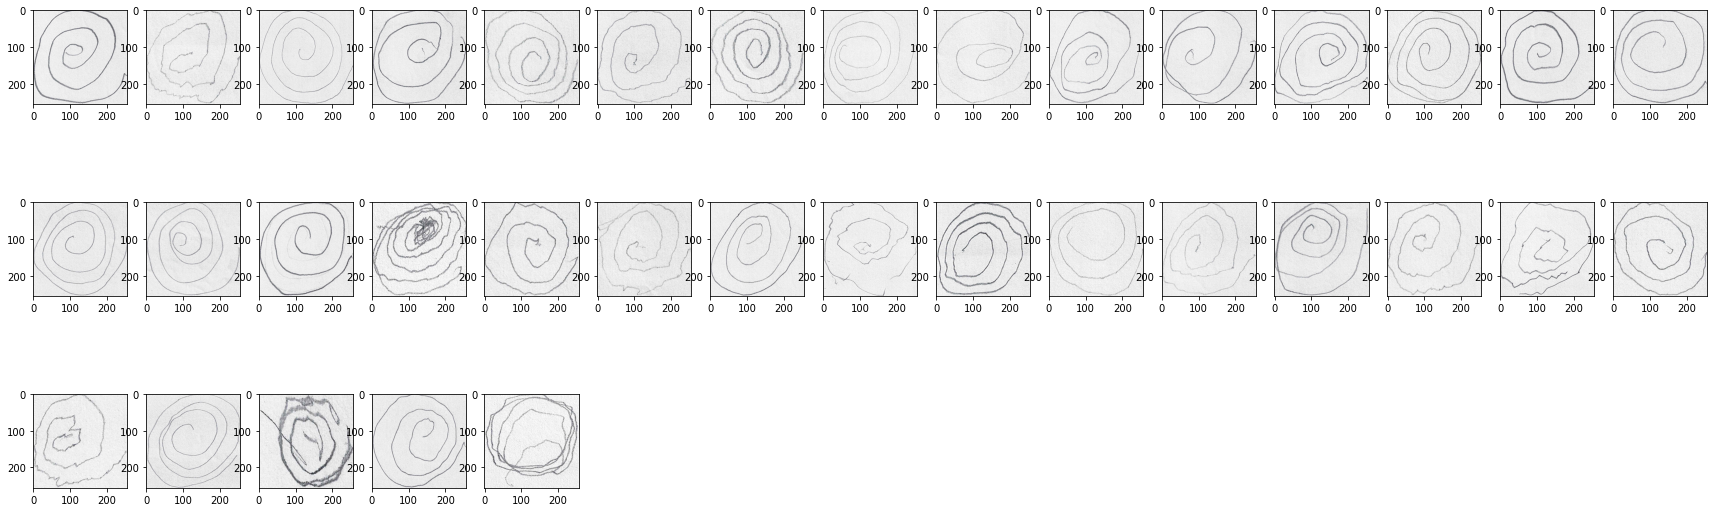

In [4]:
plt.figure(figsize=(30,10)) 
for i in range(1, 36, 1):
    plt.subplot(3,15,i )
    img = load_img("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/training/parkinson/"+
                  os.listdir("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/training/parkinson")[i])
    plt.imshow(img)   


**Plot all the testing: healthy images**

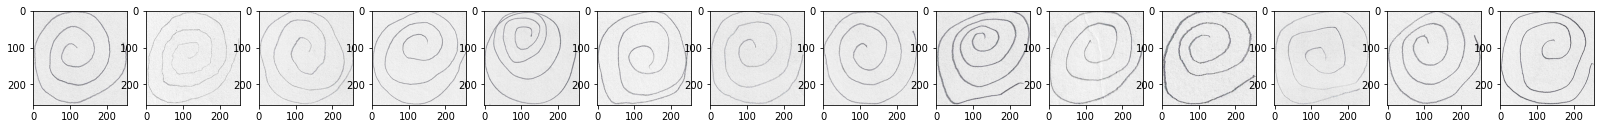

In [5]:
plt.figure(figsize=(30,10)) 
for i in range(1, 15, 1):
    plt.subplot(3,15,i )
    img = load_img("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/testing/healthy/"+
                  os.listdir("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/testing/healthy")[i])
    plt.imshow(img)   

**Plot all the testing: Parkinson images**

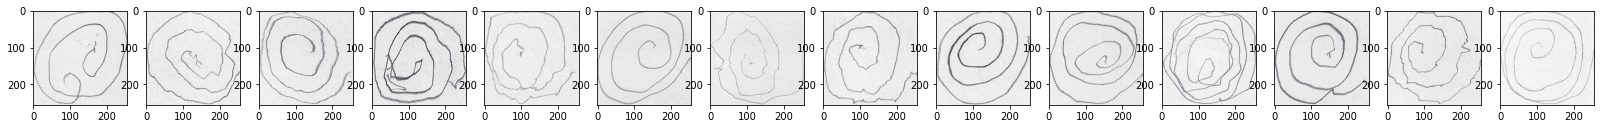

In [6]:
plt.figure(figsize=(30,10)) 
for i in range(1, 15, 1):
    plt.subplot(3,15,i )
    img = load_img("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/testing/parkinson/"+
                  os.listdir("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/testing/parkinson")[i])
    plt.imshow(img)   

## **PREPROCESS OF THE IMAGES**

### **Training images and variables**
1. Convert Open CV imported images to BGR numpy array.
2. Resize image, which are not 256 x 256 pixels with nearest neighbor method.
3. Concatenate the healthy and parkinson training dataset to one.
4. Label the images with binary categories: healthy images with 0, parkinson images with 1. 
5. Concatenate the healthy and parkinson testing dataset to one. 




In [7]:
# 2. resize function
def resize_to_256(resizeable_images):
  for i in range(len(resizeable_images)):
    if resizeable_images[i].shape!=(256,256,3):
      resizeable_images[i]=tf.image.resize(
      resizeable_images[i],
      (256,256),
      method='nearest',
      preserve_aspect_ratio=False,
      antialias=False,
      name=None
  )

  resized_images=np.array(resizeable_images);
  return resized_images

In [8]:
# 1. convert images
x_train_parkinson = [np.array(cv2.imread(file)) for file in glob.glob("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/training/parkinson/*.png")]
x_train_parkinson= resize_to_256(x_train_parkinson)
x_train_healthy=[np.array(cv2.imread(file)) for file in glob.glob("gdrive/MyDrive/archive(1)/spiral/training/healthy/*.png")]
x_train_healthy= resize_to_256(x_train_healthy)

In [9]:
# 3. concatenate inputs of the training images
x_train = np.concatenate((x_train_healthy,x_train_parkinson,))

In [10]:
# 4. labeling 
y_train_healthy = np.zeros(36, dtype=int)
y_train_parkinson = np.ones(36, dtype=int)

In [11]:
# 5. concatenate outputs of the training images
y_train=np.concatenate((y_train_healthy, y_train_parkinson))


### **Testin images and variables**
1. Convert Open CV imported images to BGR numpy array.
2. Resize image, which are not 256 x 256 pixels with nearest neighbor method.
3. Concatenate the healthy and parkinson testing dataset to one.
4. Label the images with binary categories: healthy images with 0, parkinson images with 1. 
5. Concatenate the healthy and parkinson testing dataset to one. 




In [12]:
# 1. convert images
x_test_parkinson = [np.array(cv2.imread(file)) for file in glob.glob("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/testing/parkinson/*.png")]
x_test_parkinson= resize_to_256(x_test_parkinson)
x_test_healthy=[np.array(cv2.imread(file)) for file in glob.glob("gdrive/MyDrive/archive(1)/spiral/testing/healthy/*.png")]
x_test_healthy= resize_to_256(x_test_healthy)

In [13]:
# 3. concatenate inputs of the training images
x_test = np.concatenate((x_test_healthy,x_test_parkinson,))

In [14]:
# 4. labeling 
y_test_healthy = np.zeros(15, dtype=int)
y_test_parkinson = np.ones(15, dtype=int)

In [15]:
# 5. concatenate outputs of the training images
y_test=np.concatenate((y_test_healthy, y_test_parkinson))

## **DISTRIBUTION OF ORIGINAL IMAGES**

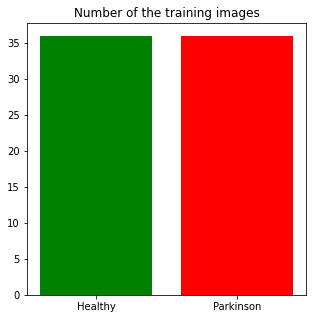

In [16]:
plt.figure(figsize=(5, 5))
y = [np.count_nonzero(y_train==0), np.count_nonzero(y_train==1)]
x = ["Healthy","Parkinson"]
plt.title("Number of the training images")
plt.bar(x, y,  color=['green', 'red'])
plt.show()

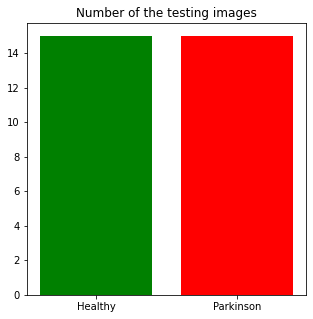

In [17]:
plt.figure(figsize=(5, 5))
y = [np.count_nonzero(y_test==0), np.count_nonzero(y_test==1)]
x = ["Healthy","Parkinson"]
plt.title("Number of the testing images")
plt.bar(x, y,  color=['green', 'red'])
plt.show()

## **DATA GENERATION**
The dataset is quite small, so I generated new images with multiple types of image transformation techniques. It is a popular method in image processing. I used for image transformations Tensorflow ImageDataGenerator function: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator.

I set:

*   Rotation range for 360 degree
*   Vertical flip
*   Horizontal flip
*   Channel shift range: randomly shifts the channel values by a random value (here 40). 
*   zoom range: zooming 

Article about use of data augmentation in image processing: https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/


Moreover the source I used for this part: https://cainvas.ai-tech.systems/notebooks/details/?path=Yuvnish17%2FParkinson%27s_Disease_Detection.ipynb&utm_source=pocket_mylist


(1, 256, 256, 3)


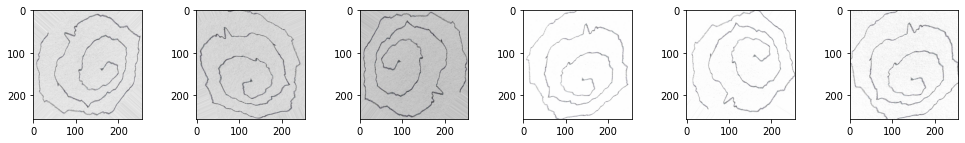

In [18]:
datagen = ImageDataGenerator( rotation_range=360, vertical_flip=True, horizontal_flip=True, channel_shift_range=40.0, zoom_range=0.05, shear_range=10)

img = load_img("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/testing/parkinson/V03PE04.png") 
x = img_to_array(img)
x = x.reshape((1,) + x.shape) 
print(x.shape) 

pic = datagen.flow(x, batch_size =1)
figure= plt.figure(figsize=(20,2))
for i in range(1,7):
  plt.subplot(1, 7, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()
figure.savefig('gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/DataGeneratedImages.png') 

In [19]:
datagen = ImageDataGenerator( rotation_range=360, vertical_flip=True, horizontal_flip=True, channel_shift_range=40.0, zoom_range=0.05, shear_range=10)

def image_generator(k,x,y,n):
  for (i, v) in enumerate(y):
      x_img = x[i]
      x_img = np.array(x_img)
      x_img = np.expand_dims(x_img, axis=0)
      aug_iter = datagen.flow(x_img, batch_size=1, shuffle=True)
      
      for j in range(n):
          aug_image = next(aug_iter)[0].astype('uint8')
          if k==0:
            x_aug_train.append(aug_image)
            y_aug_train.append(v)

            
          if k==1:
            x_aug_test.append(aug_image)
            y_aug_test.append(v)



# train variables initialization
x_aug_train =[]
y_aug_train = []
k=0
x = list(x_train)
y = list(y_train)
n=70
image_generator(k,x,y,n)
x_train = x + x_aug_train
y_train = y + y_aug_train

print(len(x_train))
print(len(y_train))


# test variables initialization
x_aug_test =[]
y_aug_test = []
k =1
x = list(x_test)
y = list(y_test)
n=30
image_generator(k,x,y,n)

x_test = x + x_aug_test
y_test = y + y_aug_test
print(len(x_test))
print(len(y_test))


5112
5112
930
930


## **DISTRIBUTION AFTER GENERATING IMAGES**

<class 'numpy.int64'>


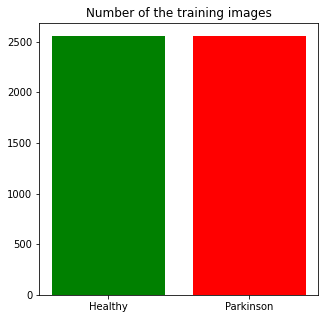

In [20]:
print((type(y_train[0])))
plt.figure(figsize=(5, 5))
healthy_y = np.count_nonzero(y_train)
parkinson_y=len(y_train)-np.count_nonzero(y_train)
y = [healthy_y, parkinson_y]
x = ["Healthy","Parkinson"]
plt.title("Number of the training images")
plt.bar(x, y,  color=['green', 'red'])
plt.show()

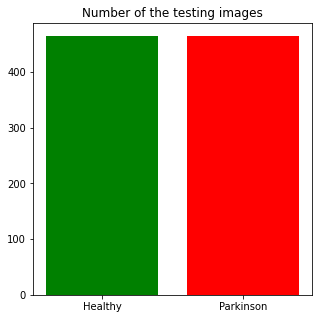

In [21]:
plt.figure(figsize=(5, 5))
healthy_y2 = np.count_nonzero(y_test)
parkinson_y2=len(y_test)-np.count_nonzero(y_test)
y = [healthy_y2, parkinson_y2]
x = ["Healthy","Parkinson"]
plt.title("Number of the testing images")
plt.bar(x, y,  color=['green', 'red'])
plt.show()

## **IMAGES PREPROCESS BEFORE TRAINING**

In [22]:
for i in range(len(x_train)):
    img = x_train[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_train[i] = img
    
x_train = np.array(x_train)
x_train = x_train/255.0

for i in range(len(x_test)):
    img = x_test[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_test[i] = img

x_test = np.array(x_test)
x_test = x_test/255.0


In [23]:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## **THE CONVOLUTIONAL NEURAL NETWORK**
Set the network architecture and parameters. 
This is a brief overview about the parameters: https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/ 

Here I use 3 Convolutional layer, with 128, 32, 64 filters , ReLu activation function and with 7 x 7, 5 x 5, 3 x 3  kernel size. Kernel_regularizer is for reduce overfitting. 
Same padding means it expands the size of the matrix at the edges, so dimensionality remains the same after the filters calculations. 

In [24]:
def parkinson_CNN_model(input_shape=(128, 128, 1)):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='ConvLayer1', activation='relu',  kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))

    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='ConvLayer2', activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='ConvLayer3', activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu', name='fc1'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax', name='fc3'))
    
    optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model




In [25]:
model= parkinson_CNN_model(input_shape=(128, 128, 1))



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## **TRAIN THE MODEL**

In [26]:
# a fasza hist = model.fit(x_train, y_train, batch_size=128, epochs=140, validation_data=(x_test, y_test))
hist = model.fit(x_train, y_train, batch_size=64, epochs=60, validation_data=(x_test, y_test))

Epoch 1/60
80/80 [==============================] - 20s 93ms/step - loss: 0.7462 - accuracy: 0.5113 - val_loss: 0.7440 - val_accuracy: 0.5000
Epoch 2/60
80/80 [==============================] - 6s 74ms/step - loss: 0.7366 - accuracy: 0.5174 - val_loss: 0.7304 - val_accuracy: 0.5000
Epoch 3/60
80/80 [==============================] - 6s 75ms/step - loss: 0.7223 - accuracy: 0.5677 - val_loss: 0.7153 - val_accuracy: 0.5441
Epoch 4/60
80/80 [==============================] - 6s 76ms/step - loss: 0.7004 - accuracy: 0.6148 - val_loss: 0.6703 - val_accuracy: 0.7441
Epoch 5/60
80/80 [==============================] - 6s 76ms/step - loss: 0.6468 - accuracy: 0.6772 - val_loss: 0.6213 - val_accuracy: 0.7634
Epoch 6/60
80/80 [==============================] - 6s 79ms/step - loss: 0.5683 - accuracy: 0.7655 - val_loss: 0.5473 - val_accuracy: 0.8043
Epoch 7/60
80/80 [==============================] - 6s 76ms/step - loss: 0.5092 - accuracy: 0.7899 - val_loss: 0.5182 - val_accuracy: 0.7667
Epoch 8/60
8

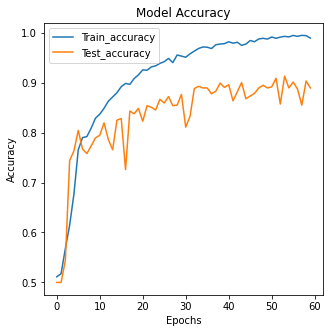

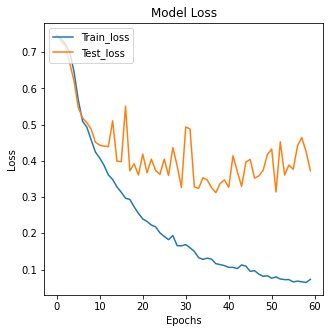

In [27]:
figure = plt.figure(figsize=(5, 5))
plt.plot(hist.history['accuracy'], label='Train_accuracy')
plt.plot(hist.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
figure = plt.gcf()
plt.savefig('spiral1.png')
plt.show()



figure2 = plt.figure(figsize=(5, 5))
plt.plot(hist.history['loss'], label='Train_loss')
plt.plot(hist.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
figure = plt.gcf()
plt.savefig('spiral2.png')
plt.show()


In [28]:
ypred = model.predict(x_test)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
print(classification_report(y_test_pred, ypred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       465
           1       0.92      0.85      0.88       465

    accuracy                           0.89       930
   macro avg       0.89      0.89      0.89       930
weighted avg       0.89      0.89      0.89       930



In [29]:
model.save('parkinsonClassifier_spiral.h5')

## **TRY THE MODEL WITH MY OWN DRAW**

In [30]:
labels = ['Healthy', 'Parkinson']
drive.mount('/content/gdrive')
image_healthy = cv2.imread("gdrive/MyDrive/Egyetem/1.félév/Képfeldolgozás/Parkinson/dataset/spiral/own_test/own_test/KL_1.JPG")
own_image=image_healthy
image_healthy = cv2.resize(image_healthy, (128, 128))
image_healthy = cv2.cvtColor(image_healthy, cv2.COLOR_BGR2GRAY)
image_healthy = np.array(image_healthy)
image_healthy = np.expand_dims(image_healthy, axis=0)
image_healthy = np.expand_dims(image_healthy, axis=-1)

ypred_healthy = model.predict(image_healthy)
print(ypred_healthy)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[[0. 1.]]


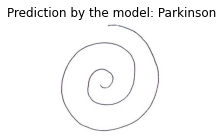

In [31]:
figure = plt.figure(figsize=(2, 2))
plt.imshow(own_image)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_healthy[0], axis=0)]}')
plt.show()

In [38]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('parkinsonClassifier.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/parkinsonClassifier.ipynb to pdf
[NbConvertApp] Support files will be in parkinsonClassifier_files/
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConvertApp] Making directory ./parkinsonClassifier_files
[NbConver

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'